In [3]:
from google.colab import drive
drive.mount('/content/drive')
import warnings

# Ignorer les avertissements spécifiques de scikit-learn
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%reload_ext autoreload
%autoreload 2
!pip install missingno
!pip install hyperopt
import gc
import random

# numpy et pandas pour la manipulation du data
import numpy as np
import pandas as pd

# sklearn
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing, model_selection, linear_model, metrics, impute, ensemble
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# hyperopt
from hyperopt import fmin, tpe, hp, anneal, Trials, space_eval

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour tracer les graphes
import matplotlib.pyplot as plt

#autres librairies
import missingno as msno

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from skimage import exposure, filters
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import os

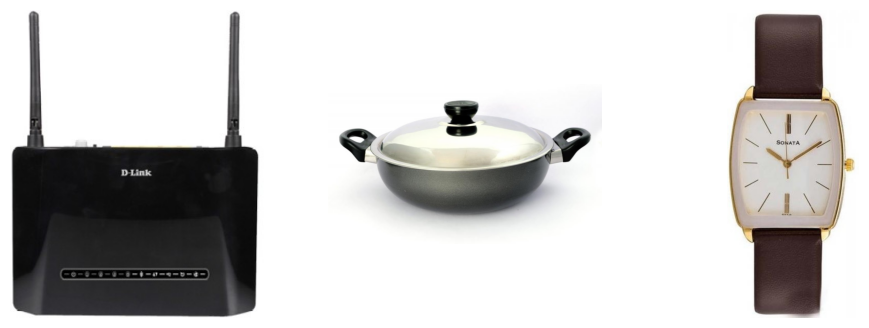

In [8]:
import matplotlib.pyplot as plt
from skimage.io import imread
import os

# Répertoire où se trouvent les fichiers images
images_path = '/content/drive/MyDrive/openclass/images/'

# Lister les fichiers dans le répertoire
images = os.listdir(images_path)

# Vérifier que le répertoire contient au moins 3 images
if len(images) < 3:
    print("Le répertoire ne contient pas suffisamment d'images.")
else:
    # Afficher les 3 premières images
    plt.figure(figsize=(12, 4))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        filename = os.path.join(images_path, images[i])
        image = imread(filename)
        plt.imshow(image)
        plt.axis('off')
    plt.show()


# Traitement de l'image

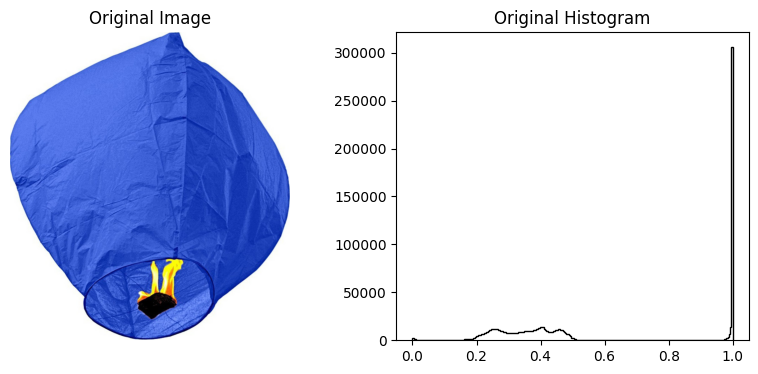

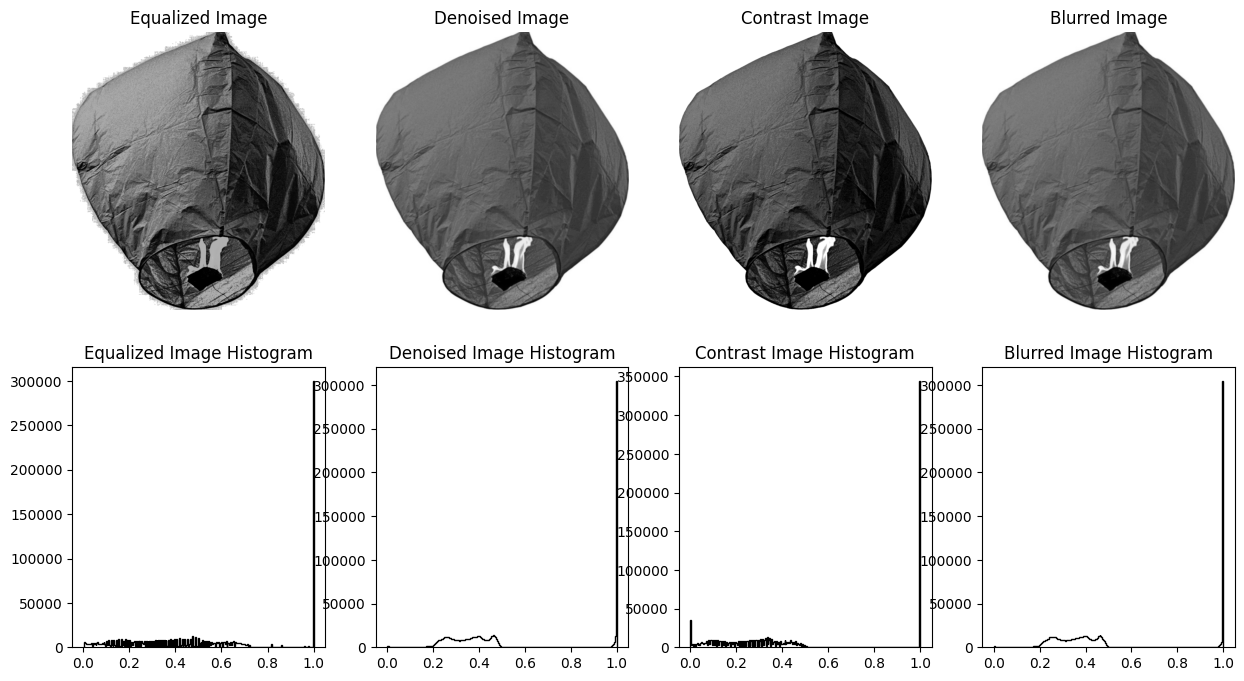

In [9]:
import matplotlib.pyplot as plt
from skimage.io import imread
import os

# Répertoire où se trouvent les fichiers images
images_path = '/content/drive/MyDrive/openclass/images/'
# Charger une image
image_name = '0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg'
image_path = os.path.join(images_path, image_name)
image = imread(image_path)

# Convertir en niveaux de gris
gray_image = rgb2gray(image)

# Afficher l'image originale et son histogramme
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.hist(gray_image.ravel(), bins=256, histtype='step', color='black')
plt.title('Original Histogram')
plt.show()

# Appliquer différentes transformations

# Equalization
equalized_image = exposure.equalize_hist(gray_image)

# Filtrage de bruit (Gaussian)
denoised_image = filters.gaussian(gray_image, sigma=1)

# Augmentation de contraste
contrast_image = exposure.rescale_intensity(gray_image, in_range=(0.2, 0.8))

# Floutage
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Afficher les images transformées et leurs histogrammes
images = [equalized_image, denoised_image, contrast_image, blurred_image]
titles = ['Equalized Image', 'Denoised Image', 'Contrast Image', 'Blurred Image']

plt.figure(figsize=(15, 8))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.subplot(2, 4, i+5)
    plt.hist(img.ravel(), bins=256, histtype='step', color='black')
    plt.title(f'{title} Histogram')
plt.show()


# Images par catégories

Catégorie : Home Furnishing
File not found: /content/drive/MyDrive/openclass/images/b33d82c619bf88c3e3bb8f53beab0c4b.jpg


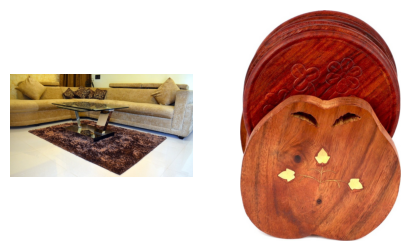


Catégorie : Baby Care
File not found: /content/drive/MyDrive/openclass/images/873a955df5a2f677a41a7efc94060e41.jpg
File not found: /content/drive/MyDrive/openclass/images/c6f4475e2385cc16ce83f21f975614b3.jpg
File not found: /content/drive/MyDrive/openclass/images/9d3ca83f7017d6e9e129964e88503ff0.jpg
Aucune image trouvée pour cette catégorie.

Catégorie : Home Decor & Festive Needs
File not found: /content/drive/MyDrive/openclass/images/922a04084481d4b3275a3f7bb54e90f3.jpg
File not found: /content/drive/MyDrive/openclass/images/a9b35b94610a3d7f4fa91f19693c5248.jpg


<Figure size 800x300 with 0 Axes>

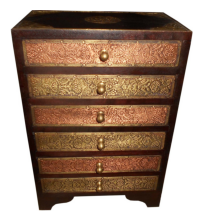


Catégorie : Kitchen & Dining
File not found: /content/drive/MyDrive/openclass/images/90f86ac4065397340e8012261577c220.jpg


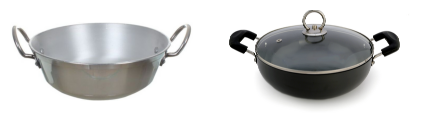


Catégorie : Beauty and Personal Care
File not found: /content/drive/MyDrive/openclass/images/cb096f17218f0e4ccd7424963e2cd0f8.jpg


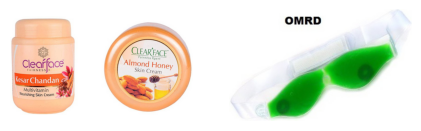


Catégorie : Computers
File not found: /content/drive/MyDrive/openclass/images/8e961e4fd248c9496ca54808d2d2b25f.jpg
File not found: /content/drive/MyDrive/openclass/images/eeecf5d16fa6591290706f1fd0c6fc6e.jpg
File not found: /content/drive/MyDrive/openclass/images/c5720509a67da707afcb6f4f0282d529.jpg
Aucune image trouvée pour cette catégorie.

Catégorie : Watches
File not found: /content/drive/MyDrive/openclass/images/c91f9dc1fdd8b4d60c6b2a2b607e3e8f.jpg


<Figure size 800x300 with 0 Axes>

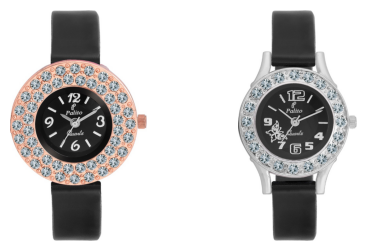

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Spécifiez le chemin correct vers votre fichier CSV dans Google Drive
csv_path = '/content/drive/MyDrive/openclass/df.csv'

# Lire le fichier CSV dans un DataFrame
df = pd.read_csv(csv_path)

# Récupération des noms de catégories principales
df['label_name'] = df['product_category_tree'].apply(lambda x: x.split('["')[1].split(' >>')[0])

# Encodage des labels
category_label_encoder = LabelEncoder()
df['label'] = category_label_encoder.fit_transform(df['label_name'])

# Suppression des colonnes inutilisées
df = df[['image', 'label_name', 'label']]

# Répertoire où se trouvent les fichiers images
images_path = '/content/drive/MyDrive/openclass/images/'

# Affichage de 3 images de chaque catégorie
for category in df['label_name'].unique():
    mask = df['label_name'] == category
    images = df.loc[mask, 'image'].sample(3).values
    print(f"Catégorie : {category}")
    plt.figure(figsize=(8, 3))
    count = 0  # Compteur pour le nombre d'images affichées
    for i in range(len(images)):
        filename = os.path.join(images_path, images[i])
        if os.path.exists(filename):
            image = imread(filename)
            plt.subplot(1, 3, count + 1)
            plt.imshow(image)
            plt.axis('off')
            count += 1
        else:
            print(f"File not found: {filename}")

        # Si 3 images sont déjà affichées, sortir de la boucle
        if count >= 3:
            break
    if count > 0:
        plt.show()
    else:
        print("Aucune image trouvée pour cette catégorie.")
    print()


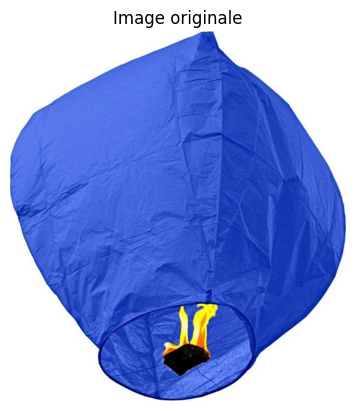

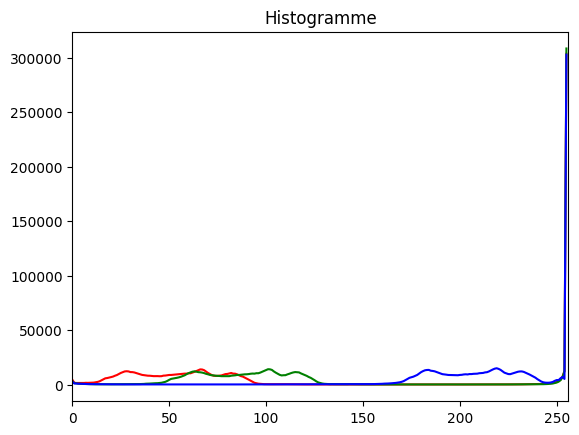

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Répertoire où se trouvent les fichiers images
images_path = '/content/drive/MyDrive/openclass/images/'

# Fonction d'affichage d'un histogramme
def plot_histogram(image):
    color = ('r', 'g', 'b')
    for i, col in enumerate(color):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=col)
    plt.title('Histogramme')
    plt.xlim([0, 256])
    plt.show()

# Spécification du nom de fichier de l'image de test
image_file = '0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg'

# Chemin complet vers l'image de test
image_path = os.path.join(images_path, image_file)

# Vérification de l'existence du fichier et affichage de l'image et de son histogramme
if os.path.exists(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title('Image originale')
        plt.axis('off')
        plt.show()

        # Affichage de l'histogramme
        plot_histogram(image_rgb)
    else:
        print(f"Erreur : Impossible de charger l'image à partir de {image_path}")
else:
    print(f"Erreur : Fichier non trouvé {image_path}")


# Extraction des descripteurs avec SIFT

Nombre de descripteurs SIFT : 1644


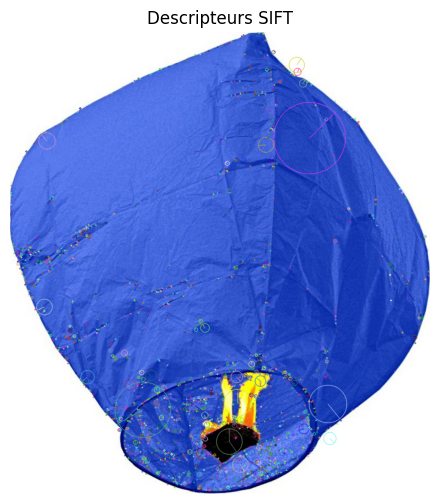

Nombre de descripteurs ORB : 500


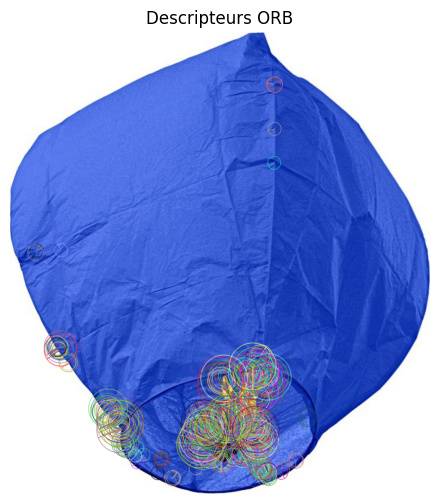

In [12]:
# Extraction des descripteurs avec SIFT
def extract_features(image, method='SIFT'):
    if method == 'SIFT':
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(image, None)
    elif method == 'ORB':
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(image, None)
    return keypoints, descriptors

# Affichage des descripteurs pour les méthodes SIFT et ORB
methods = ['SIFT', 'ORB']

for method in methods:
    keypoints, descriptors = extract_features(image_rgb, method=method)
    print(f"Nombre de descripteurs {method} : {descriptors.shape[0]}")

    # Affichage des descripteurs sur l'image
    image_with_keypoints = cv2.drawKeypoints(image_rgb, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(8, 6))
    plt.imshow(image_with_keypoints)
    plt.title(f'Descripteurs {method}')
    plt.axis('off')
    plt.show()


# Générer les « features » des images via un bag of virtual words

In [13]:
from scipy.cluster.vq import kmeans, vq

# Fonction pour créer un Bag of Words
def create_bag_of_words(descriptors_list, num_clusters=100):
    all_descriptors = np.vstack(descriptors_list)
    voc, variance = kmeans(all_descriptors, num_clusters, 1)
    features = np.zeros((len(descriptors_list), num_clusters), "float32")
    for i in range(len(descriptors_list)):
        words, distance = vq(descriptors_list[i], voc)
        for w in words:
            features[i][w] += 1
    return features

# Liste pour stocker les descripteurs de toutes les images
descriptors_list = []

# Parcourir toutes les images du DataFrame
for img_file in df['image']:
    img_path = os.path.join(images_path, img_file)
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        _, des = extract_features(img_rgb, method='SIFT')
        if des is not None:
            descriptors_list.append(des)

# Utiliser tous les descripteurs pour créer le Bag of Words
features = create_bag_of_words(descriptors_list, num_clusters=100)  # Utiliser 100 clusters
print(f"Shape of features: {features.shape}")


Shape of features: (340, 100)


# Réduction des dimensions avec T-SNE

(340, 3)


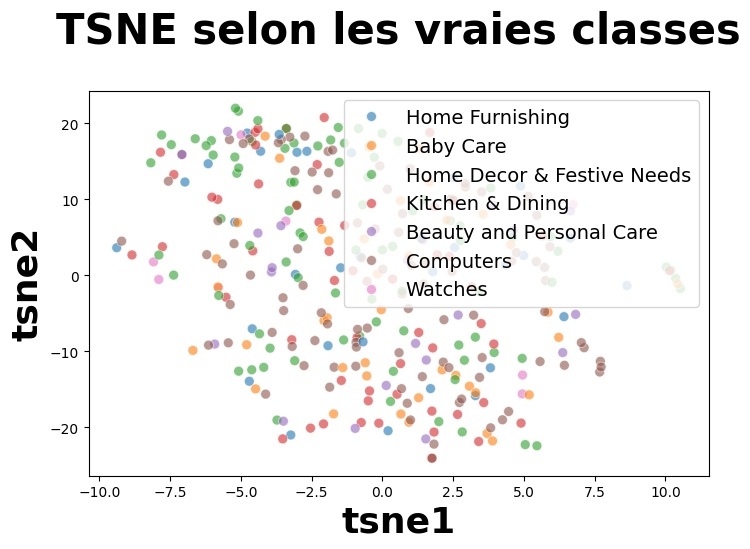

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Réduire les dimensions avec PCA avant t-SNE (si nécessaire)
# Remplacez `features` par votre DataFrame ou matrice de caractéristiques d'origine
# Exemple : features = df.drop(columns=["image_path", "label_name", "label"])
pca = PCA(n_components=50)  # Choisir un nombre raisonnable de composantes pour la PCA
feat_pca = pca.fit_transform(features)

# Initialiser t-SNE avec les paramètres donnés
tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=10)
X_tsne = tsne.fit_transform(feat_pca)

# Créer un DataFrame avec les résultats t-SNE
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = df["label_name"]  # Utiliser "label_name" ou la colonne de classe correcte

print(df_tsne.shape)

# Afficher les points t-SNE avec les classes d'origine
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=len(df["label_name"].unique())),
    s=50, alpha=0.6,
    data=df_tsne,
    legend="brief"
)

plt.title('TSNE selon les vraies classes', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')
plt.legend(prop={'size': 14})
plt.show()


# Étape 5 : Clustering K-means et comparaison avec les catégories réelles

In [15]:
# Déterminer la perplexité en fonction du nombre d'échantillons ou d'un autre critère
perplexity = min(len(features) // 2, 30)  # Choisissez le minimum entre la moitié du nombre d'échantillons et 30

# Initialiser TSNE avec la perplexité déterminée
tsne = TSNE(
    n_components=2,
    perplexity=perplexity,
    n_iter=2000,
    init='random',
    random_state=0
)

# Réduire les features (ici 'features') à 2 dimensions avec TSNE
X_tsne = tsne.fit_transform(features)

# Créer un DataFrame pour stocker les composantes TSNE
df_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=['tsne 1', 'tsne 2'])

# Ajouter les catégories à votre DataFrame TSNE
df_tsne["Catégorie"] = df["label_name"]


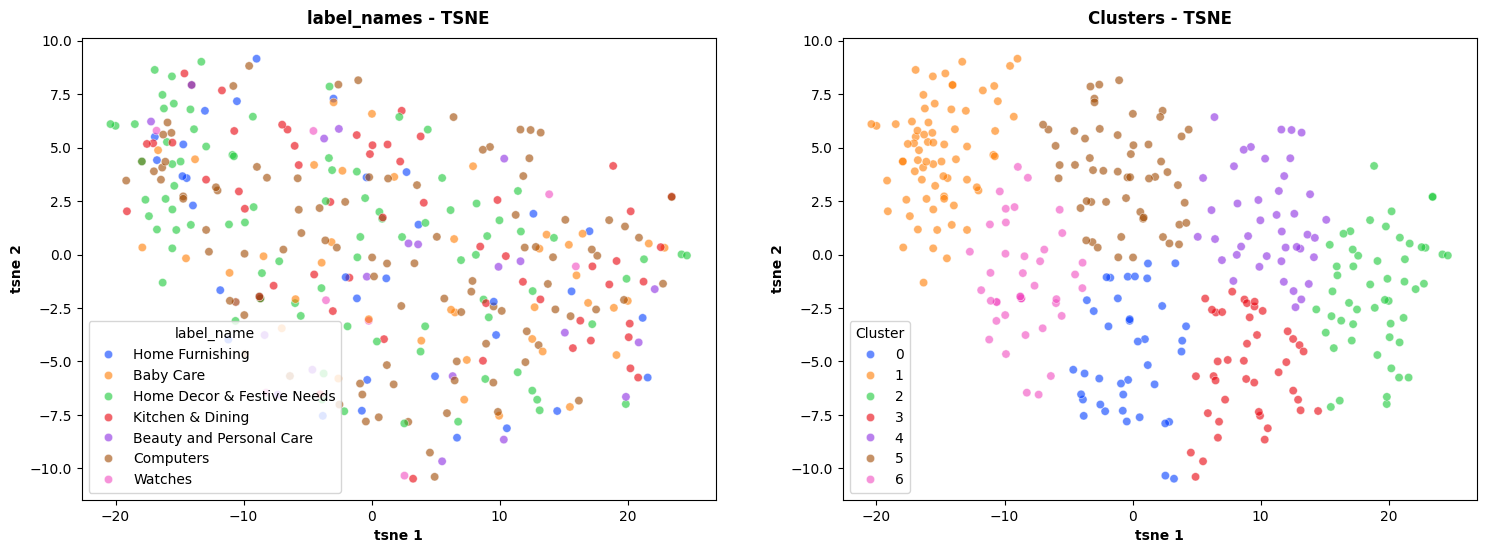

In [16]:
import seaborn as sns

# Création de clusters KMeans
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=0)
kmeans.fit(X_tsne)
df_tsne['label_name'] = df['label_name']


# Ajouter les étiquettes des clusters au DataFrame df_tsne
df_tsne['Cluster'] = kmeans.labels_

# Visualisations
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

for i, criteria in enumerate(('label_name', 'Cluster')):
    sns.scatterplot(data=df_tsne, x='tsne 1', y='tsne 2', hue=criteria, palette='bright', alpha=0.6, ax=ax[i])
    ax[i].set_title(f"{criteria}s - TSNE", fontweight='bold', pad=10)
    ax[i].set_xlabel('tsne 1', fontweight = 'bold')
    ax[i].set_ylabel('tsne 2', fontweight = 'bold')

plt.show()


In [17]:
df_tsne

,tsne 1,tsne 2,Catégorie,label_name,Cluster
0,21.558023,-5.752392,Home Furnishing,Home Furnishing,2
1,21.643370,0.515129,Baby Care,Baby Care,2
2,1.142009,-1.113035,Home Furnishing,Home Furnishing,0
3,-3.814517,-7.543444,Home Furnishing,Home Furnishing,0
4,-11.196174,-3.976026,Home Furnishing,Home Furnishing,6
...,...,...,...,...,...
335,-3.920750,-1.570174,Home Decor & Festive Needs,Home Decor & Festive Needs,6
336,2.549829,-7.897182,Home Decor & Festive Needs,Home Decor & Festive Needs,0
337,-3.087682,3.948311,Home Decor & Festive Needs,Home Decor & Festive Needs,5
338,-3.904449,-0.380883,Baby Care,Baby Care,6


In [18]:
from sklearn.metrics import adjusted_rand_score

# Calcul du score ARI
ari_score = adjusted_rand_score(df_tsne['label_name'], df_tsne['Cluster'])
print("Adjusted Rand Index (ARI) Score:", ari_score)


Adjusted Rand Index (ARI) Score: 0.01461199530278227


In [19]:
csv_path = '/content/drive/MyDrive/openclass/df_new.csv'
df.to_csv(csv_path, index=False)
